In [18]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
import pandas as pd
import re
from IPython.display import clear_output
from PIL import Image
from pathlib import Path

RAW_DIR = "/Users/farhanoktavian/imperial/thesis/sandbox/dataset/raw"
STACKREG_DIR = "/Users/farhanoktavian/imperial/thesis/sandbox/dataset/stackreg"
REG_TYPE = "combined"

In [30]:
sample_id = "HS004"
run_id = "Run10"

raw_sample_dir = Path(RAW_DIR) / sample_id / run_id

ids = ['', '4', '5']
regstack_runs = [Path(f"{STACKREG_DIR}{id}") / sample_id / run_id for id in ids]

run_paths = [raw_sample_dir] + regstack_runs

In [31]:
def read_image(img_dir):
    img = cv2.imread(str(img_dir), cv2.IMREAD_GRAYSCALE)
    return img

def get_image_from_dir(run_dir):
    curr_dir = run_dir
    paths = [x for x in curr_dir.iterdir() if x.suffix.lower() == ".png"]
    paths = sorted(paths, key=lambda x: int(re.search(r"\d+", x.stem).group()))
    images = [read_image(x) for x in paths]

    if len(images) > 29:
        skip_count = len(images) // 29
        images = images[::skip_count]
    
    return images

run_images = [get_image_from_dir(run_dir) for run_dir in run_paths]

In [20]:
len_images = 29

fig, axes = plt.subplots(2, 2, figsize=(15, 15))
axes[0][0].title.set_text("Raw")
axes[0][1].title.set_text("Ptv")
axes[1][0].title.set_text("Xiaofei's")
axes[1][1].title.set_text("RANSACFlow")

axes[0][0].imshow(run_images[0][0], cmap="gray", vmin=0, vmax=255)
axes[0][1].imshow(run_images[1][0], cmap="gray", vmin=0, vmax=255)
axes[1][0].imshow(run_images[2][0], cmap="gray", vmin=0, vmax=255)
axes[1][1].imshow(run_images[3][0], cmap="gray", vmin=0, vmax=255)

def animate(i):
    clear_output(wait=True)
    print(f"Frame {i+1}")
    axes[0][0].imshow(run_images[0][i], cmap="gray", vmin=0, vmax=255, animated=True)
    axes[0][1].imshow(run_images[1][i], cmap="gray", vmin=0, vmax=255, animated=True)
    axes[1][0].imshow(run_images[2][i], cmap="gray", vmin=0, vmax=255, animated=True)
    axes[1][1].imshow(run_images[3][i], cmap="gray", vmin=0, vmax=255, animated=True)

ani = animation.FuncAnimation(fig, animate, interval=75, frames=len_images)
ani.save(f"result/{sample_id}/{run_id}-{REG_TYPE}.mp4")

plt.close("all")
print("done")

Frame 29
done


Frame 20 has the largest variance of 4863.308687397829


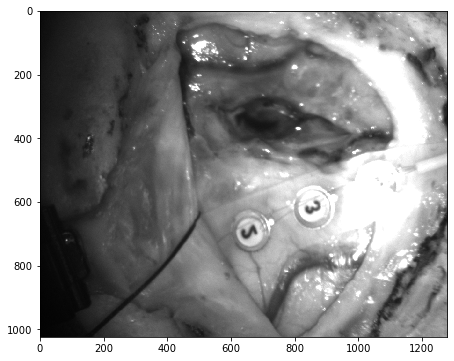

In [32]:
raw_images = run_images[0]
largest_var = 0
largest_var_index = 0
for idx, img in enumerate(raw_images):
    if np.var(img) > largest_var:
        largest_var = np.var(img)
        largest_var_index = idx

print(f"Frame {largest_var_index+1} has the largest variance of {largest_var}")
fig, axes = plt.subplots(1, 1, figsize=(10, 6))
axes.imshow(raw_images[largest_var_index], cmap="gray", vmin=0, vmax=255)
plt.show()